# Programming Exercise 1
**Auhtors:** Guillermo Infante, Mario Acera <br>
**Machine Learning - Master in Intelligent Interactive Systems**

## 1. Regression Task

In [1]:
import sklearn.datasets as load
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

np.random.seed(100)

data = load.load_svmlight_file('abalone_scale.txt', n_features = 8)

Process the dataset to make it a dense numpy matrix for a better manipulation to take random samples

In [2]:
y = data[1].reshape(-1,1)
X = data[0].todense()
# append the prediction to the end of the features, so it is x_1, x_2, ... x_n, y
dataset = np.append(X, y, axis=1)

#### Questions 1-3

In [3]:
# First iterate over an array of sizes in this case w
start = 10
size_and_error = dict()
size_and_time = dict()
size_and_var = dict()

n_features = 8

weights = np.array([]).reshape(-1, 8)

number_of_permutations = 50

for N in np.arange(start, dataset.shape[0], 10).tolist():
        
    mses = []
    times = []
    weights_averaged = np.zeros(n_features).reshape(-1,8)
       
    for i in range(0, number_of_permutations):
        
        subdataset = dataset[np.random.choice(dataset.shape[0], N, replace=False),:]
        
        X = subdataset[:,:n_features]
        y = subdataset[:,-1].reshape(-1,1) 
        
        start = timer()
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)
        end = timer() - start
        
        mses.append(mean_squared_error(y_pred, y))
        times.append(end)
        
        weights_averaged = weights_averaged + reg.coef_        
    
    weights_averaged = weights_averaged / number_of_permutations
    weights = np.vstack((weights, weights_averaged))
    size_and_error[N] = np.mean(mses)
    size_and_time[N] = np.mean(times)
    size_and_var[N] = np.var(mses)
    

In [4]:
x = list(size_and_error.keys())
mse = [size_and_error[i] for i in x]
times = [size_and_time[i] for i in x]
var = [size_and_var[i] for i in x]

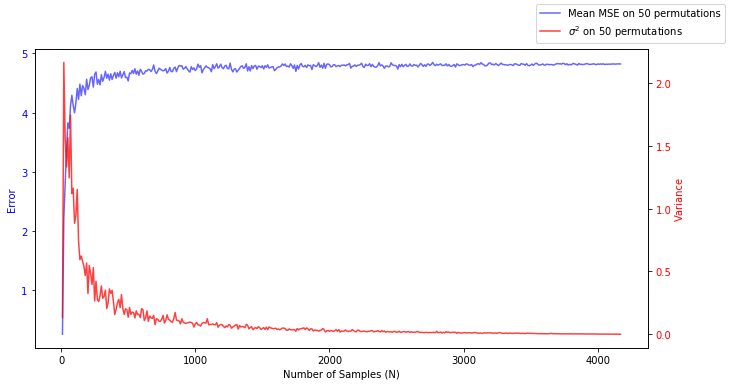

In [5]:
fig, ax1 = plt.subplots(figsize=(11,5.5))
color = 'blue'
ax1.set_xlabel('Number of Samples (N)')
ax1.set_ylabel('Error', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(x, mse, color=color, alpha=0.6)
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Variance', color=color)
ax2.plot(x, var, color=color, alpha=0.75)
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(['Mean MSE on '+ str(number_of_permutations)+ ' permutations','$\sigma^{2}$ on '+str(number_of_permutations)+' permutations'])
plt.show()

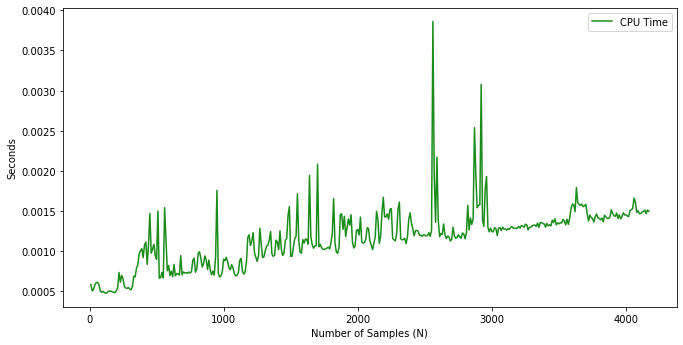

In [6]:
fig, ax = plt.subplots(figsize=(11,5.5))
color = 'green'
ax.set_xlabel('Number of Samples (N)')
ax.set_ylabel('Seconds')
ax.plot(x, times, color=color, alpha=0.9)
ax.legend(['CPU Time'])

#### Question 4

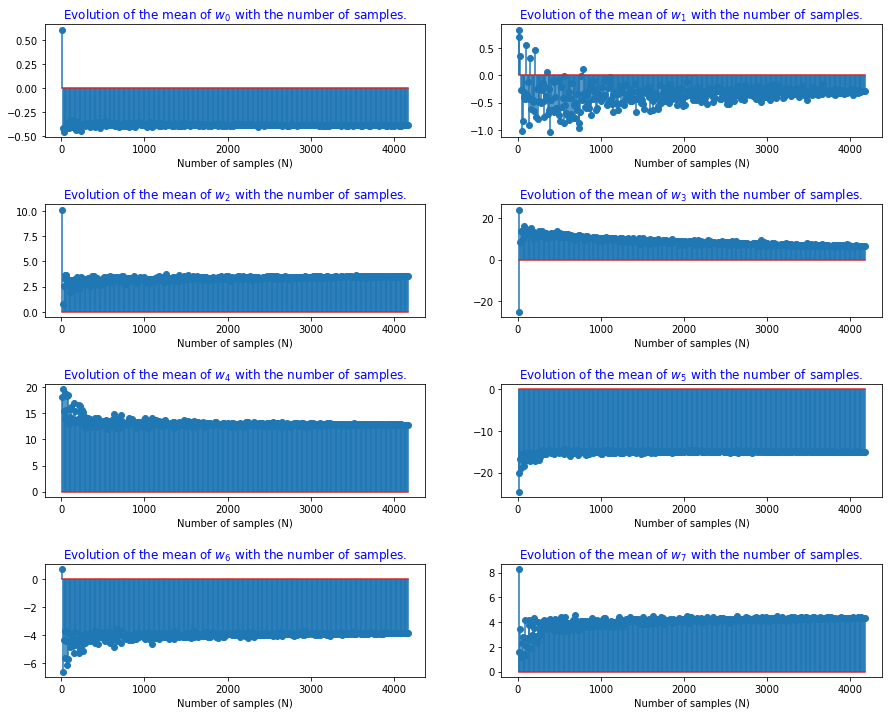

In [7]:
nrows = 4
ncols = 2
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,12))
plt.subplots_adjust(hspace = 0.6)

c = 0

for i in range(0, nrows):
    for j in range(0, ncols):
        ax = axis[i,j]
        ax.set_xlabel('Number of samples (N)')
        ax.set_title('Evolution of the mean of $w_'+ str(c) +'$ with the number of samples.', color='blue')
        ax.stem(list(size_and_error.keys()), weights[:,c], use_line_collection=True)
        c+=1

## 2. Classification Task

#### Questions 1-3

In [8]:
n_features = 4
data = load.load_svmlight_file('svmguide1.txt', n_features = n_features)

y = data[1].reshape(-1,1)
X = data[0].todense()
# append the prediction to the end of the features, so it is x_1, x_2, ... x_n, y
dataset = np.append(X, y, axis=1)

In [12]:
start = 200
size_and_error = dict()
size_and_time = dict()

weights = np.array([]).reshape(-1, n_features)

step = 10

number_of_permutations = 50

for N in np.arange(start, dataset.shape[0], step).tolist():
        
    accuracies = []
    times = []
    weights_averaged = np.zeros(n_features).reshape(-1,n_features)
    
    for i in range(0, number_of_permutations):
    
        subdataset = dataset[np.random.choice(dataset.shape[0], N, replace=False),:]

        X = subdataset[:,:n_features]
        y = np.ravel(subdataset[:,-1].reshape(-1,1))

        start = timer()
        reg = LogisticRegression(solver='lbfgs', penalty='none', max_iter=500).fit(X, y)
        accuracy = reg.score(X,y)
        end = timer() - start

        accuracies.append(accuracy)
        times.append(end)
        
        weights_averaged = weights_averaged + reg.coef_     


    weights_averaged = weights_averaged / number_of_permutations
    weights = np.vstack((weights, weights_averaged))
    size_and_error[N] = np.mean(accuracies)
    size_and_time[N] = np.mean(times)
    size_and_var[N] = np.var(accuracies)    

In [13]:
x = list(size_and_error.keys())
accuracy = [1-size_and_error[i] for i in x]
times = [size_and_time[i] for i in x]
var = [size_and_var[i] for i in x]

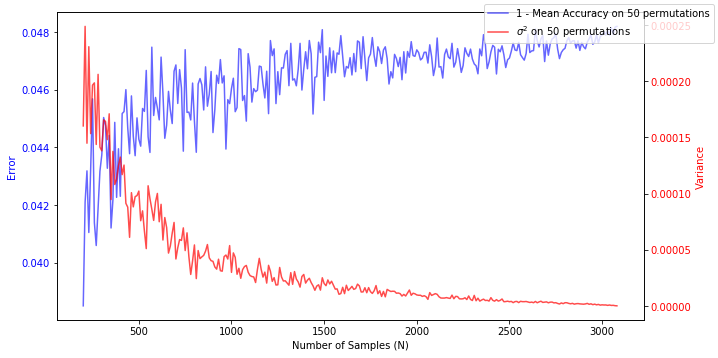

In [14]:
fig, ax1 = plt.subplots(figsize=(10,5))
color = 'blue'
ax1.set_xlabel('Number of Samples (N)')
ax1.set_ylabel('Error', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(x, accuracy, color=color, alpha=0.6)

ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel('Variance', color=color)
ax2.plot(x, var, color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(['1 - Mean Accuracy on '+ str(number_of_permutations)+ ' permutations','$\sigma^{2}$ on '+str(number_of_permutations)+' permutations'])
fig.tight_layout()

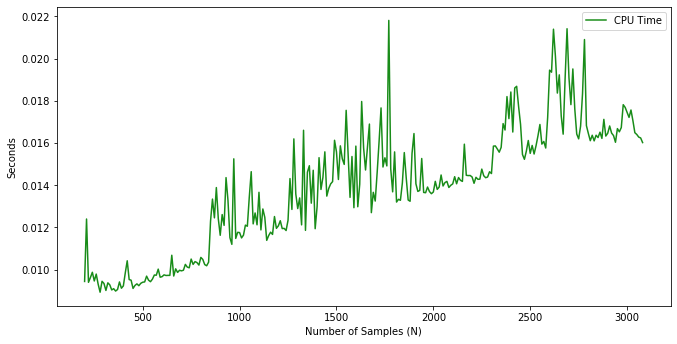

In [15]:
fig, ax = plt.subplots(figsize=(11,5.5))
color = 'green'
ax.set_xlabel('Number of Samples (N)')
ax.set_ylabel('Seconds')
ax.plot(x, times, color=color, alpha=0.9)
ax.legend(['CPU Time'])
plt.show()

#### Question 4

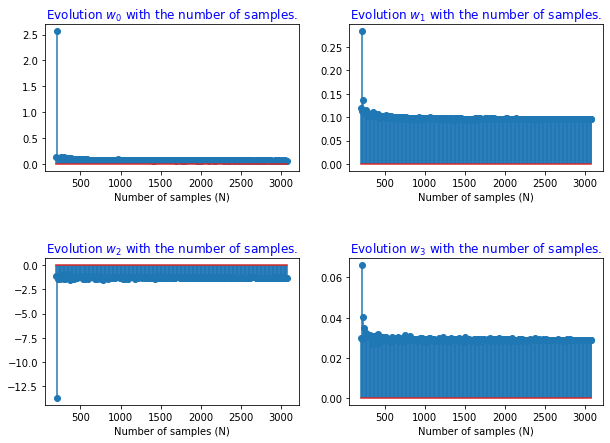

In [19]:
nrows = 2
ncols = 2
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,7))
plt.subplots_adjust(hspace = 0.6)

c = 0

for i in range(0, nrows):
    for j in range(0, ncols):
        ax = axis[i,j]
        ax.set_xlabel('Number of samples (N)')
        ax.set_title('Evolution $w_'+ str(c) +'$ with the number of samples.', color='blue')
        ax.stem(list(size_and_error.keys()), weights[:,c], use_line_collection=True)
        c+=1